In [1]:
import sklearn
from PIL import Image
import skimage.io as SKimg
import numpy as np
import random
import pyhdf.SD as hdf
import matplotlib.pyplot as plt
import ogr
import gdal
from osgeo import gdalconst
import rasterio as rio
from scipy.sparse import csr_matrix
import scipy.io as sio 

from sklearn.cluster import MiniBatchKMeans, KMeans  
from sklearn.metrics.pairwise import pairwise_distances_argmin

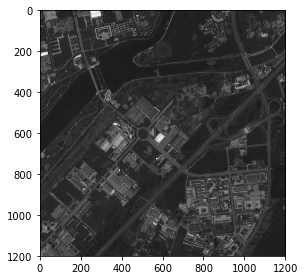

(1200, 1200)

In [2]:
Tpan =SKimg.imread("F:/pythontestdata/MyTiff/tianhui1200pan.tif")
SKimg.imshow(Tpan)
SKimg.show()
Tpan.shape

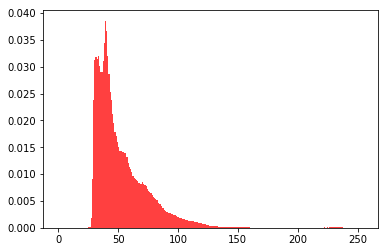

In [3]:
plt.figure()
#要对图像求直方图，就需要先把图像矩阵进行flatten操作，使之变为一维数组，然后再进行统计
arr=Tpan.flatten()
n, bins, patches = plt.hist(arr, bins=np.arange(0,255), normed=1, facecolor='red', alpha=0.75) 
plt.show()

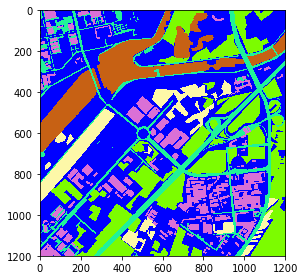

(1200, 1200, 3)

In [4]:
GroudTrue =SKimg.imread("F:/pythontestdata/MyTiff/gt_tianhui1200.tif")
SKimg.imshow(GroudTrue)
SKimg.show()
GroudTrue.shape

[[6 6 4 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 [6 6 6 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]
 [6 3 3 ..., 2 2 2]]


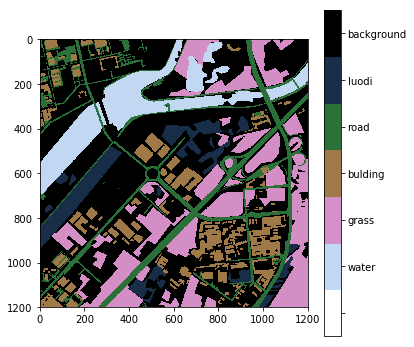

In [5]:
#matlab文件名  
matfn='gt_tianhui1200.mat';
data=sio.loadmat(matfn);
mk = data['gt']
print(mk)

moban=(mk*0)+1;

plt.figure(figsize=(6,6))
im = Image.fromarray(mk);
plt.imshow(im,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5)
plt.show();

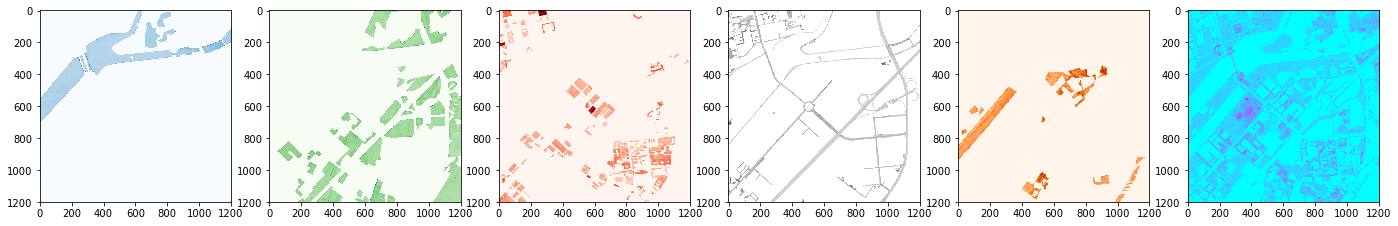

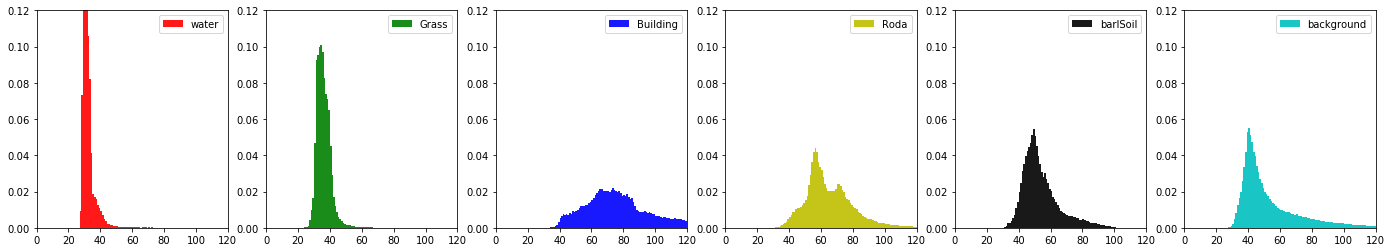

In [6]:
allValue=[];  allTempMask=[];
for j in range(1,7):
    tempLabel=mk==j
    tempMask=tempLabel*Tpan
    allTempMask.append(tempMask)
    finalTemp = tempMask[tempMask>0]
    allValue.append(finalTemp);

plt.figure(figsize=(24,5))
Cmap=['Blues','Greens','Reds','Greys','Oranges','cool'];
for k in range(0,len(allTempMask)):
    plt.subplot(1,6,k+1)
    im = Image.fromarray(allTempMask[k])
    plt.imshow(im,cmap=Cmap[k]);

plt.figure(figsize=(24,4));cor=['r','g','b','y','k','c'];
allLabel=['water','Grass','Building','Roda','barlSoil','background'];
Kwars=dict(histtype='stepfilled',alpha=0.9,normed=True,bins=np.arange(0,255));
for N in range(0,len(allValue)):
    plt.subplot(1,6,N+1)
    plt.hist(allValue[N],color=cor[N],**Kwars,label=allLabel[N]);
    plt.ylim(0,0.12)
    plt.xlim(0,120)
    plt.legend();
plt.show();

[31 31 30 ..., 79 84 67]


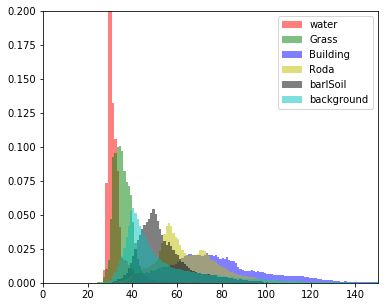

2
0.0


In [7]:
Kwars=dict(histtype='stepfilled',alpha=0.5,normed=True,bins=np.arange(0,255));
print(allValue[0])
allLabel=['water','Grass','Building','Roda','barlSoil','background'];  cor=['r','g','b','y','k','c'];

plt.figure(figsize=(6,5));   returnValue=[];
for i in range(0,6):
    intervals=plt.hist(allValue[i],color=cor[i],**Kwars,label=allLabel[i])
    returnValue.append(intervals);
plt.legend(); plt.xlim(0,150); plt.ylim(0,0.2);
plt.show()

Xvalue=[]; YFrenquce=[];
for F in range(0,len(returnValue)):
    Xvalue.append(returnValue[F][1])
    YFrenquce.append(returnValue[F][0]);

l=len(YFrenquce[4])
print(bins[2])
print(YFrenquce[2][8])


In [8]:
cols=Tpan.shape[0];  Rows=Tpan.shape[1];  

AllPlabel=[];
for k in range(0,len(bins)-1):
    maxP=0;  INdex=0;
    temp=[YFrenquce[0][k],YFrenquce[1][k],YFrenquce[2][k],YFrenquce[3][k],YFrenquce[4][k],YFrenquce[5][k]];
    
    for L in range(0,len(temp)):
        if(temp[L]>maxP):
            maxP=temp[L]
            INdex=L+1;
    
    tempIndex=((np.abs(Tpan-bins[k]))<0.1)*moban;
    temLabel=tempIndex*INdex
    AllPlabel.append(temLabel);

sumLabel=AllPlabel[0];
for i in range(1,len(AllPlabel)):
    sumLabel=sumLabel+AllPlabel[i];

predictLabel=sumLabel;

print(predictLabel)

TrueOrFalse=(predictLabel==mk)
TrueValue=TrueOrFalse[TrueOrFalse>0]
FalseValue=TrueOrFalse[TrueOrFalse==0]
correct=len(TrueValue)/(len(TrueValue)+len(FalseValue));
print(len(TrueValue));  print(len(FalseValue));  print(correct);

[[6 6 5 ..., 6 6 6]
 [6 6 5 ..., 6 6 6]
 [6 6 5 ..., 6 6 6]
 ..., 
 [3 3 3 ..., 1 1 1]
 [3 3 3 ..., 1 1 1]
 [3 3 3 ..., 1 1 1]]
586987
853013
0.4076298611111111


6
0


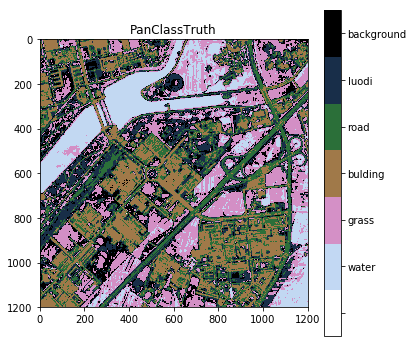

In [9]:
print(np.max(predictLabel)); print(np.min(predictLabel));

mylabel=predictLabel;

plt.figure(figsize=(6,6));
imF = Image.fromarray(mylabel);
plt.imshow(imF,cmap=plt.cm.get_cmap('cubehelix_r',7));
cbar=plt.colorbar()
cbar.set_ticks(np.linspace(0,7,8))
cbar.set_ticklabels(('  ','water','grass','bulding','road','luodi','background'))
plt.clim(-0.5,6.5);
plt.title('PanClassTruth');
plt.show();

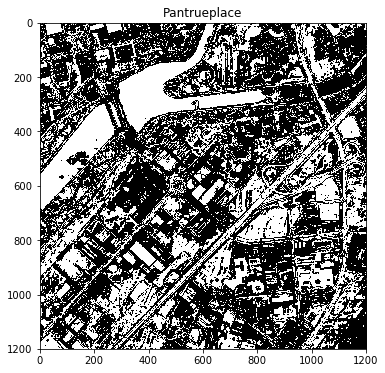

In [10]:
TRUEplace=(mylabel==mk)*10000;
FalsePlace=(mylabel!=mk)*10000;

plt.figure(figsize=(6,6))
imT = Image.fromarray(TRUEplace);
plt.imshow(imT,cmap='Oranges');
plt.title('Pantrueplace');
plt.show();

In [11]:
x = np.linspace(0,1200,1200)
y = np.linspace(0,1200,1200)
X,Y = np.meshgrid(x,y)
Xzip=list(zip(X.flat,Y.flat))
points = [point for point in zip(X.flat,Y.flat)]
points = np.array(points)

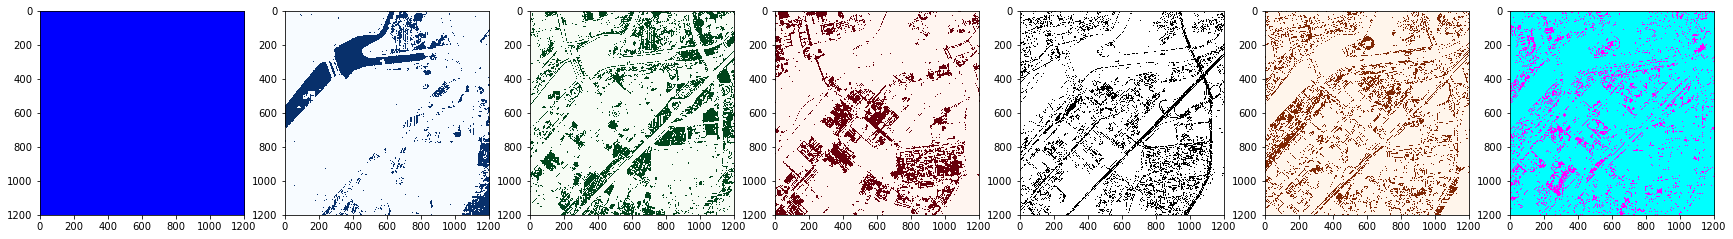

In [12]:
Cmap=['winter','Blues','Greens','Reds','Greys','Oranges','cool']
allLabel=['water','Grass','Building','Roda','barlSoil','background'];
plt.figure(figsize=(30,4))
for M in range(0,7):
    temp=(predictLabel==M)*predictLabel
    plt.subplot(1,7,M+1)
    im = Image.fromarray(temp*100)
    sct=plt.imshow(im,cmap=Cmap[M])
    #plt.colorbar(sct,allLabel[M-1])
plt.show()